<a href="https://colab.research.google.com/github/LuisHenrique7/TCC_Testes_Agrupamento/blob/main/(Votacao_%2B_Tema)Analise_dos_Modelos_de_Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Lendo Conjunto de Dados

In [ ]:
df_votos_deputados = pd.read_csv('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/VotacaoDosDeputados(23_03_23).csv')
df_votos_deputados

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio
...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim


In [ ]:
df_proposicoes_temas_deputados = pd.read_json('/content/drive/MyDrive/TCC II/APP 2/Datasets Gerados/TemaProposicaoDosDeputados.json')
df_proposicoes_temas_deputados.columns = ['id_deputado', 'nome',	'proposicoes',	'temas_proposicoes']
df_proposicoes_temas_deputados

,id_deputado,nome,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...
508,160632,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


In [ ]:
df_caracteristicas_deputados_geral = pd.merge(df_votos_deputados, df_proposicoes_temas_deputados, left_on='id_deputado', right_on='id_deputado', suffixes=('', '_df_temas'))
df_caracteristicas_deputados_geral

,id_deputado,nome,siglaPartido,siglaUf,Votacao 2301683-33,Votacao 2350702-8,Votacao 2350706-6,Votacao 2351332-7,nome_df_temas,proposicoes,temas_proposicoes
0,220593,Abilio Brunini,PL,MT,Sim,Sim,Vazio,Não,Abilio Brunini,"[2352557, 2352553, 2352549, 2352547, 2352524, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
1,204379,Acácio Favacho,MDB,AP,Não,Sim,Sim,Vazio,Acácio Favacho,"[2352547, 2352545, 2352541, 2352476, 2352473, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
2,220714,Adail Filho,REPUBLICANOS,AM,Vazio,Sim,Não,Sim,Adail Filho,"[2352559, 2352556, 2352549, 2352548, 2352547, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
3,221328,Adilson Barroso,PL,SP,Vazio,Sim,Vazio,Sim,Adilson Barroso,"[2352062, 2352046, 2351960, 2351680, 2351620, ...","[Sem tema, Sem tema, Sem tema, [Direito Penal ..."
4,204560,Adolfo Viana,PSDB,BA,Vazio,Vazio,Vazio,Vazio,Adolfo Viana,"[2352559, 2352547, 2352545, 2352514, 2352501, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
...,...,...,...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,SOLIDARIEDADE,MG,Não,Sim,Sim,Sim,Zé Silva,"[2352559, 2352557, 2352549, 2352545, 2352473, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
509,220558,Zé Trovão,PL,SC,Sim,Sim,Não,Não,Zé Trovão,"[2352549, 2352545, 2352541, 2352524, 2352521, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."
510,204517,Zé Vitor,PL,MG,Vazio,Vazio,Sim,Sim,Zé Vitor,"[2352596, 2352557, 2352556, 2352476, 2352049, ...","[Sem tema, Sem tema, Sem tema, [Direitos Human..."
511,160592,Zeca Dirceu,PT,PR,Vazio,Vazio,Vazio,Sim,Zeca Dirceu,"[2352556, 2352547, 2352445, 2352444, 2351948, ...","[Sem tema, Sem tema, Sem tema, Sem tema, Sem t..."


# Codifica Colunas com características categóricas

## Colunas de votação

In [ ]:
# Votacao 2301683-33	Votacao 2350702-8	Votacao 2350706-6	Votacao 2351332-7

In [ ]:
print(len(df_caracteristicas_deputados_geral['Votacao 2301683-33']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350702-8']))
print(len(df_caracteristicas_deputados_geral['Votacao 2350706-6']))
print(len(df_caracteristicas_deputados_geral['Votacao 2351332-7']))

513
513
513
513


In [ ]:
tipo_voto_codificado = np.concatenate((df_caracteristicas_deputados_geral['Votacao 2301683-33'].values, df_caracteristicas_deputados_geral['Votacao 2350702-8'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2350706-6'].values), axis=0)
tipo_voto_codificado = np.concatenate((tipo_voto_codificado, df_caracteristicas_deputados_geral['Votacao 2351332-7'].values), axis=0)
tipo_voto_codificado = pd.factorize(tipo_voto_codificado)[0]
print(len(tipo_voto_codificado))
tipo_voto_codificado

2052


array([0, 1, 2, ..., 0, 0, 0])

In [ ]:
n_cols = 4
limite = []

for i in range(len(df_caracteristicas_deputados_geral), n_cols * len(df_caracteristicas_deputados_geral), len(df_caracteristicas_deputados_geral)):
  print(i, end='   ')
  limite.append(i)

513   1026   1539   

In [ ]:
lista_votacao_codificado_2301683_33 = tipo_voto_codificado[:limite[0]]
lista_votacao_codificado_2350702_8 = tipo_voto_codificado[limite[0] : limite[1]]
lista_votacao_codificado_2350706_6 = tipo_voto_codificado[limite[1] : limite[2]]
lista_votacao_codificado_2351332_7 = tipo_voto_codificado[limite[2] : ]

print(len(lista_votacao_codificado_2301683_33))
print(len(lista_votacao_codificado_2350702_8))
print(len(lista_votacao_codificado_2350706_6))
print(len(lista_votacao_codificado_2351332_7))

513
513
513
513


## Coluna Estado e Partido

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaUf']]
dados_para_codificar

,siglaUf
0,MT
1,AP
2,AM
3,SP
4,BA
...,...
508,MG
509,SC
510,MG
511,PR


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
uf_codificado = enc.transform(dados_para_codificar).toarray()
print(uf_codificado.shape)
uf_codificado

(513, 27)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
uf_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
uf_codificado

array([ 0,  1,  2,  3,  4,  3,  5,  6,  7,  7,  8,  9, 10, 11,  3, 12,  7,
        3,  3,  4, 13,  3,  7,  3, 14,  4, 15, 16, 17,  0, 17, 18,  2,  6,
       19,  6, 10, 20, 10, 17,  6,  9, 21, 13,  4,  3,  9,  7,  3,  3, 14,
        4,  2, 22, 20,  1, 16,  4,  3, 16, 16, 16, 23, 24, 15, 15, 11,  7,
        7,  6,  3,  8, 24,  2,  4,  3,  3, 19,  7, 13, 16,  3, 20,  3, 15,
       19, 22,  6,  5, 10,  3,  9,  3,  4, 16, 16, 16, 20,  4, 17, 20, 19,
        0, 25,  0, 20,  3, 21,  7, 25, 18, 24,  7,  4,  8,  6, 16,  5,  4,
       14, 19, 16,  7, 19, 10,  7,  3, 10, 12,  5,  6, 26,  9,  3,  9, 14,
        6, 15,  3,  3, 16, 15,  7, 17,  6,  4, 15, 15,  9,  6, 16, 10,  6,
        1, 17, 25, 22,  6, 10, 24, 18,  5,  9, 17, 12,  6, 10,  3, 20, 21,
        9, 13,  4,  0,  6, 15, 20,  3, 11,  6,  6, 10, 18,  0, 17, 26, 19,
        3,  3,  2,  3, 20, 15,  4,  7, 10, 20, 23, 20, 20, 15, 13,  5, 22,
       22,  7,  6, 11,  4, 23, 16, 19, 15, 24, 21,  8, 15,  6,  3, 18, 19,
       18, 11,  7, 16,  5

In [ ]:
dados_para_codificar = df_caracteristicas_deputados_geral.loc[:, ['siglaPartido']]
dados_para_codificar

,siglaPartido
0,PL
1,MDB
2,REPUBLICANOS
3,PL
4,PSDB
...,...
508,SOLIDARIEDADE
509,PL
510,PL
511,PT


In [ ]:
enc = OneHotEncoder()
enc.fit(dados_para_codificar)
partido_codificado = enc.transform(dados_para_codificar).toarray()
print(partido_codificado.shape)
partido_codificado

(513, 22)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
partido_codificado = pd.factorize(np.ravel(dados_para_codificar.values))[0]
partido_codificado

array([ 0,  1,  2,  0,  3,  4,  5,  3,  5,  6,  5,  7,  5,  0,  1,  2,  1,
        7,  8,  2,  2,  9,  7,  7,  9, 10, 11,  0, 12,  0,  5,  2,  8,  5,
        7,  7,  0,  0,  6,  5, 13,  1,  2,  2, 14,  0,  1,  8,  7,  8,  5,
        9, 14,  5,  2,  1, 15, 11,  1, 16,  5,  7,  9,  3, 14,  3,  0,  0,
        7, 13, 17,  0,  7,  0,  0,  0,  0,  1,  2,  9,  0,  3,  7,  7,  7,
        0, 14, 18,  1, 14,  2,  9, 14, 14, 18,  9,  0,  5,  5,  2, 11,  1,
        9,  0,  0,  0,  5,  9,  5,  9,  5,  3, 10,  9,  9,  7,  9,  0, 10,
        5,  0, 14,  3,  0,  9, 14,  9,  9,  2,  7, 13, 14,  0,  5,  0,  5,
        9,  9,  1,  0,  0, 17,  7,  0, 14, 14,  2,  5,  7,  5,  7, 14,  0,
        6,  9,  9,  7, 19,  0,  5, 17,  9,  1, 16,  1,  6,  6,  0,  5,  9,
        1,  0,  9,  1,  0,  7, 16, 18,  7,  0,  2,  1,  5,  9, 17, 14,  9,
        1,  5,  9,  9, 16,  9,  6, 18,  9,  9,  7,  5,  0,  0,  0,  6,  7,
        7,  2, 19,  2, 14,  0,  0,  3,  9,  3,  5, 16,  0,  2, 12, 17,  4,
        0,  2,  0, 18, 12

## Coluna Temas

In [ ]:
lista_temas = []

for i in df_proposicoes_temas_deputados.index[:1]:
  temas = df_proposicoes_temas_deputados['temas_proposicoes'][i]
  for tema in temas:
    if type(tema) == list:
      for t in tema:
        if t not in lista_temas:
          lista_temas.append(t)
    else:
      if tema not in lista_temas:
          lista_temas.append(tema)

print(len(lista_temas))

9


In [ ]:
qtde_proposicoes_tema_geral = []

for i in df_proposicoes_temas_deputados.index:
  qtde_proposicoes_tema = [0 for _ in lista_temas]
  temas = df_proposicoes_temas_deputados['temas_proposicoes'][i]
  for tema in temas:
    if type(tema) == list:
      for t in tema:
        if t in lista_temas:
          qtde_proposicoes_tema[lista_temas.index(t)] += 1
    else:
      if tema in lista_temas:
        qtde_proposicoes_tema[lista_temas.index(tema)] += 1
  qtde_proposicoes_tema_geral.append(qtde_proposicoes_tema)

np.array(qtde_proposicoes_tema_geral).shape

(513, 9)

In [ ]:
df_qtde_temas_deputados = pd.DataFrame(qtde_proposicoes_tema_geral, columns=lista_temas)
df_qtde_temas_deputados.insert(0, 'id_deputado', list(df_caracteristicas_deputados_geral['id_deputado']))
df_qtde_temas_deputados

,id_deputado,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,82,2,4,1,1,2,2,2,1
1,204379,63,1,3,1,0,0,1,0,2
2,220714,128,1,3,0,2,0,0,0,1
3,221328,43,2,2,0,1,1,1,1,1
4,204560,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
508,160632,112,1,1,0,1,0,0,0,2
509,220558,112,2,4,1,1,2,2,2,1
510,204517,58,2,5,1,1,2,2,2,1
511,160592,130,0,0,0,0,0,0,0,0


# Seleciona dados para o treinamento

In [ ]:
df_caracteristicas_selecionadas_deputados = df_caracteristicas_deputados_geral.iloc[: , [0,1]]

# df_caracteristicas_selecionadas_deputados['partido'] = partido_codificado.tolist()
# df_caracteristicas_selecionadas_deputados['estado'] = uf_codificado.tolist()
df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
df_caracteristicas_selecionadas_deputados['Votacao 2350706_6'] = lista_votacao_codificado_2350706_6
df_caracteristicas_selecionadas_deputados['Votacao 2351332_7'] = lista_votacao_codificado_2351332_7

df_caracteristicas_selecionadas_deputados

<ipython-input-15-1d198d0d1a2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2301683_33'] = lista_votacao_codificado_2301683_33
<ipython-input-15-1d198d0d1a2a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_caracteristicas_selecionadas_deputados['Votacao 2350702_8'] = lista_votacao_codificado_2350702_8
<ipython-input-15-1d198d0d1a2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7
0,220593,Abilio Brunini,0,0,2,1
1,204379,Acácio Favacho,1,0,0,2
2,220714,Adail Filho,2,0,1,0
3,221328,Adilson Barroso,2,0,2,0
4,204560,Adolfo Viana,2,2,2,2
...,...,...,...,...,...,...
508,160632,Zé Silva,1,0,0,0
509,220558,Zé Trovão,0,0,1,1
510,204517,Zé Vitor,2,2,0,0
511,160592,Zeca Dirceu,2,2,2,0


In [ ]:
df_caracteristicas_selecionadas_deputados = df_caracteristicas_selecionadas_deputados.merge(df_qtde_temas_deputados, left_on='id_deputado', right_on='id_deputado')
df_caracteristicas_selecionadas_deputados

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,Abilio Brunini,0,0,2,1,82,2,4,1,1,2,2,2,1
1,204379,Acácio Favacho,1,0,0,2,63,1,3,1,0,0,1,0,2
2,220714,Adail Filho,2,0,1,0,128,1,3,0,2,0,0,0,1
3,221328,Adilson Barroso,2,0,2,0,43,2,2,0,1,1,1,1,1
4,204560,Adolfo Viana,2,2,2,2,40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,160632,Zé Silva,1,0,0,0,112,1,1,0,1,0,0,0,2
509,220558,Zé Trovão,0,0,1,1,112,2,4,1,1,2,2,2,1
510,204517,Zé Vitor,2,2,0,0,58,2,5,1,1,2,2,2,1
511,160592,Zeca Dirceu,2,2,2,0,130,0,0,0,0,0,0,0,0


# Ajustando características multidimensionais

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
print(X.shape)
X

(513, 6)


array([[list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        0, 0, 2, 1],
       [list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        1, 0, 0, 2],
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]),
        list([0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        2, 0, 1, 0],
       ...,
       [list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [ ]:
for i in X:
  i[0] = np.array(i[0])
  i[1] = np.array(i[1])

In [ ]:
X.ravel()

array([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
              0., 0., 0., 0., 0.])                                               ,
       array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
              0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
       0, ..., 0, 2, 0], dtype=object)

In [ ]:
X = X.ravel().reshape(len(df_caracteristicas_selecionadas_deputados), -1)
print(X.shape)
X

(513, 6)


array([[array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        0, 0, 2, 1],
       [array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0.])                                               ,
        array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])                           ,
        1, 0, 0, 2],
       [array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 1., 0., 0.])                                               ,
        array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
               0., 0., 0., 0., 0., 0., 0

In [ ]:
df_caracteristicas_selecionadas_deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 512
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_deputado         513 non-null    int64 
 1   nome                513 non-null    object
 2   partido             513 non-null    int64 
 3   estado              513 non-null    int64 
 4   Votacao 2301683_33  513 non-null    int64 
 5   Votacao 2350702_8   513 non-null    int64 
 6   Votacao 2350706_6   513 non-null    int64 
 7   Votacao 2351332_7   513 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 36.1+ KB


# Usando MeanShift

In [ ]:
# The following bandwidth can be automatically detected using
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 4
Silhouette Coefficient: 0.568


In [ ]:
# print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

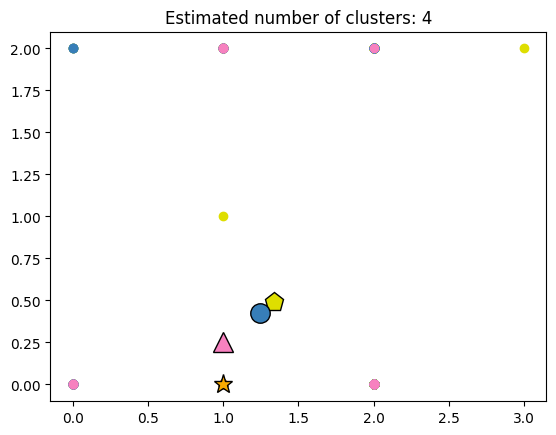

In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# KMeans

Silhouette Coefficient: 0.617


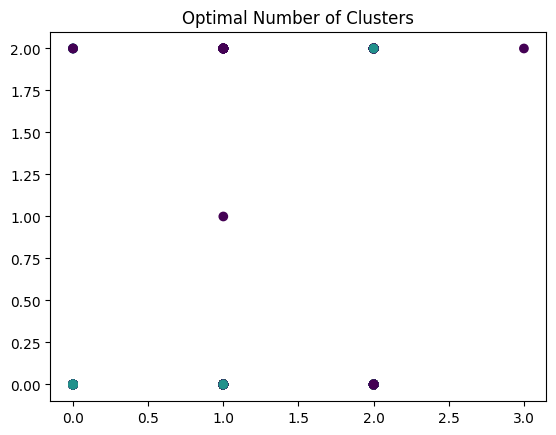

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

k_means = KMeans(n_clusters=3, **common_params)
k_means.fit(X)
labels = k_means.labels_

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

y_pred = k_means.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

In [ ]:
pca = PCA(n_components=2).fit_transform(X)
pca

array([[14.00026147,  2.37638256],
       [-5.04253589, -0.07524725],
       [59.94907389, -0.99198812],
       ...,
       [-9.99582112,  3.1559445 ],
       [61.89946423, -4.05875836],
       [10.93515268, -1.68538481]])

Silhouette Coefficient: 0.623


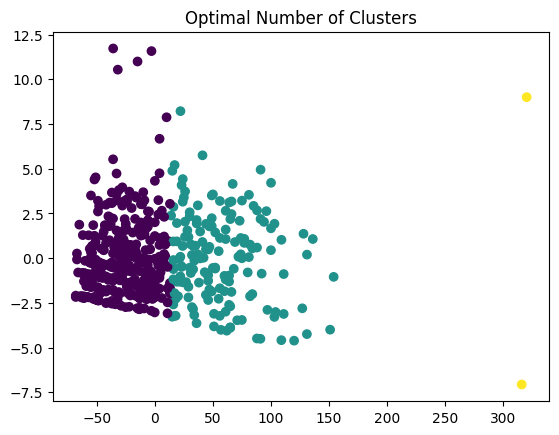

In [ ]:
X = pca

random_state = 170

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}


k_means = KMeans(n_clusters=3, **common_params)
k_means.fit(X)
labels = k_means.labels_

print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

y_pred = k_means.predict(X)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

# DBSCAN

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]

# bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=100)

# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# ms.fit(X)
# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

db = DBSCAN(eps=0.5, min_samples=200).fit(X)
labels = db.labels_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

number of estimated clusters : 1


ValueError: ignored

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values

db = DBSCAN(eps=0.3, min_samples=200).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Estimated number of clusters: 0
Estimated number of noise points: 513


In [ ]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
markers = ["p", "o", "^", '*', 's']

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.scatter(df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 0], df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values[my_members, 1], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# Nova seção

## KMeans

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X.shape

(513, 13)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.619

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.621

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.621

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6205661442053666}

Best Silhouette Coefficient: 0.621




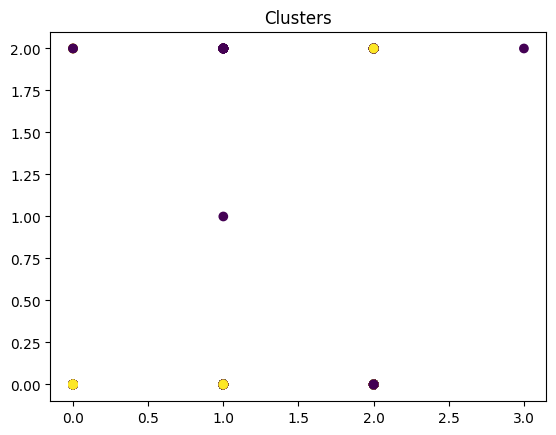

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans MinMaxScaler

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X.shape

(513, 13)

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 0.5       , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.33333333, 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.66666667, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.66666667, 1.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.66666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X[:, 0]
      eixo_y = X[:, 1]
      y_pred = k_means.predict(X)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.420

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.420

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 50, 'silhouette': 0.4197558550243834}

Best Silhouette Coefficient: 0.420




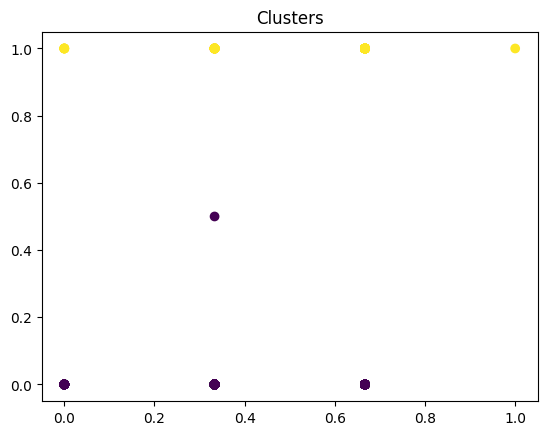

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.625

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.626

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.626

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 80, 'silhouette': 0.6255946462767934}

Best Silhouette Coefficient: 0.626




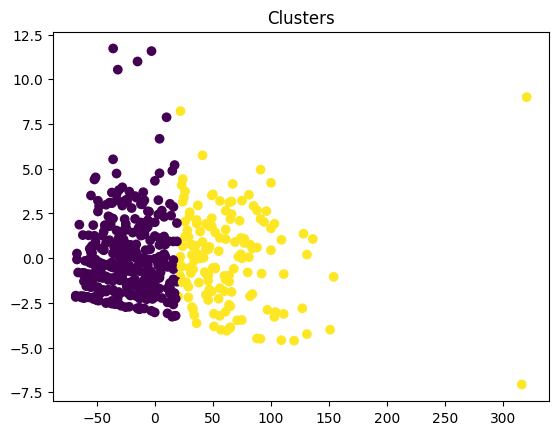

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## KMeans PCA com MinMaxScaler

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 0.5       , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.33333333, 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.66666667, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.66666667, 1.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.66666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:
print([_ for _ in range(2, 7)])
print([_ for _ in range(50, 201, 10)])

[2, 3, 4, 5, 6]
[50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [ ]:
# Define modelo e parametros
clustering_model = KMeans()
parametros = {
                "n_init": ["auto"],
                'n_clusters': [_ for _ in range(2, 7)],
                'random_state': [_ for _ in range(50, 201, 10)]
            }

# Busca pelo melhor modelo
eixo_x = None
eixo_y = None
y_pred = None
silhouette = -1
best_model = {
    'n_clusters': None,
    'random_state': None,
    'silhouette': silhouette
}

for n_clusters in parametros['n_clusters']:
  for random_state in parametros['random_state']:
    k_means = KMeans(n_clusters=n_clusters, n_init='auto', random_state=random_state)
    k_means.fit(X_pca)
    labels = k_means.labels_
    silhouette_current = metrics.silhouette_score(X_pca, labels)
    print(f"n_clusters = {n_clusters}, random_state = {random_state}")
    print(f"Silhouette Coefficient: {silhouette_current:.3f}\n")
    if silhouette_current > silhouette:
      eixo_x = X_pca[:, 0]
      eixo_y = X_pca[:, 1]
      y_pred = k_means.predict(X_pca)
      silhouette = silhouette_current
      best_model = {
          'n_clusters': n_clusters,
          'random_state': random_state,
          'silhouette': silhouette
      }

n_clusters = 2, random_state = 50
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 60
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 70
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 80
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 90
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 100
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 110
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 120
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 130
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 140
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 150
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 160
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 170
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 180
Silhouette Coefficient: 0.671

n_clusters = 2, random_state = 190
Silhouette Coefficient: 0.671

n_clusters = 2,

In [ ]:
best_model

{'n_clusters': 2, 'random_state': 50, 'silhouette': 0.6710386280767668}

Best Silhouette Coefficient: 0.671




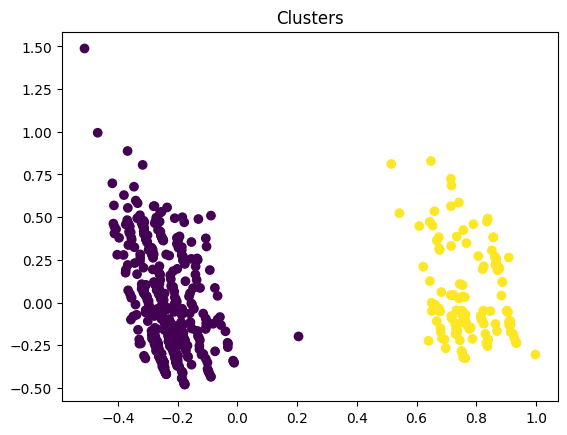

In [ ]:
print(f"Best Silhouette Coefficient: {silhouette:.3f}\n\n")

plt.scatter(eixo_x, eixo_y, c=y_pred)
plt.title("Clusters")
plt.show()

## Usando MeanShift

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X.shape

(513, 13)

In [ ]:
[print(q/10, s) for q in range(0, 11) for s in range(100, 201, 50)]

0.0 100
0.0 150
0.0 200
0.1 100
0.1 150
0.1 200
0.2 100
0.2 150
0.2 200
0.3 100
0.3 150
0.3 200
0.4 100
0.4 150
0.4 200
0.5 100
0.5 150
0.5 200
0.6 100
0.6 150
0.6 200
0.7 100
0.7 150
0.7 200
0.8 100
0.8 150
0.8 200
0.9 100
0.9 150
0.9 200
1.0 100
1.0 150
1.0 200


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
list_estimate_bandwidth = [estimate_bandwidth(X, quantile=q/10, n_samples=s) for q in range(1, 11) for s in range(100, 201, 50)]
list_estimate_bandwidth

[13.280537971747952,
 12.52569675541699,
 13.640722056128288,
 22.426496045568435,
 21.628147959701383,
 22.557741841782228,
 31.96522033985631,
 30.494814847105395,
 31.781700405046912,
 42.06976592543765,
 39.61590393284285,
 39.744998310190645,
 50.58919558970768,
 46.973989056229726,
 47.09838914335501,
 61.014117784493365,
 54.6605291368224,
 54.69258423232892,
 74.23143916435643,
 67.01917918315556,
 66.2805813305418,
 93.22825439539272,
 85.88711807449954,
 84.64494965563372,
 105.11366992673368,
 100.06269716890361,
 100.7102714435599,
 315.851855106673,
 317.1513993171448,
 322.71092935181247]

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 13.280537971747952, quantile = 1, n_samples = 100
number of estimated clusters : 13
Silhouette Coefficient: 0.352


bandwidth = 12.52569675541699, quantile = 1, n_samples = 150
number of estimated clusters : 14
Silhouette Coefficient: 0.436


bandwidth = 13.640722056128288, quantile = 1, n_samples = 200
number of estimated clusters : 11
Silhouette Coefficient: 0.457


bandwidth = 22.426496045568435, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.567


bandwidth = 21.628147959701383, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.565


bandwidth = 22.557741841782228, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.567


bandwidth = 31.96522033985631, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.756


bandwidth = 30.494814847105395, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coef

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

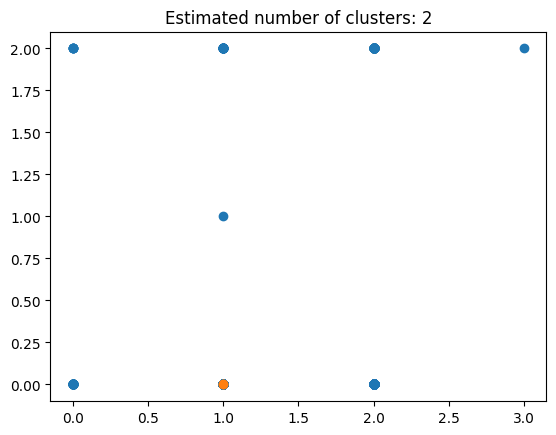

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X[my_members, 0], X[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

## Usando MeanShift PCA

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 12.46717757015001, quantile = 1, n_samples = 100
number of estimated clusters : 10
Silhouette Coefficient: 0.481


bandwidth = 11.69511158627887, quantile = 1, n_samples = 150
number of estimated clusters : 13
Silhouette Coefficient: 0.464


bandwidth = 12.802387957236766, quantile = 1, n_samples = 200
number of estimated clusters : 10
Silhouette Coefficient: 0.475


bandwidth = 21.964614797768327, quantile = 2, n_samples = 100
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 21.176865647073967, quantile = 2, n_samples = 150
number of estimated clusters : 4
Silhouette Coefficient: 0.573


bandwidth = 22.04105548492017, quantile = 2, n_samples = 200
number of estimated clusters : 4
Silhouette Coefficient: 0.568


bandwidth = 31.593075531556018, quantile = 3, n_samples = 100
number of estimated clusters : 2
Silhouette Coefficient: 0.758


bandwidth = 30.142550528136333, quantile = 3, n_samples = 150
number of estimated clusters : 2
Silhouette Coeff

In [ ]:
best_model

{'quantile': 8,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

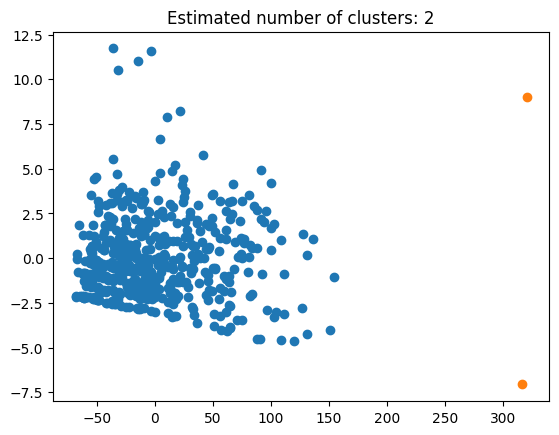

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
grupo_1 = []
grupo_2 = []
for index in df_caracteristicas_selecionadas_deputados.index:
  if labels[index] == 0:
    grupo_1.append(df_caracteristicas_selecionadas_deputados['nome'][index])
  else:
    grupo_2.append(df_caracteristicas_selecionadas_deputados['nome'][index])

print("grupo 1")
np.array(grupo_1)

grupo 1


array(['Abilio Brunini', 'Acácio Favacho', 'Adail Filho',
       'Adilson Barroso', 'Adolfo Viana', 'Adriana Ventura',
       'Adriano do Baldy', 'Aécio Neves', 'Afonso Hamm', 'Afonso Motta',
       'Aguinaldo Ribeiro', 'Airton Faleiro', 'AJ Albuquerque',
       'Alberto Fraga', 'Alberto Mourão', 'Albuquerque', 'Alceu Moreira',
       'Alencar Santana', 'Alex Manente', 'Alex Santana',
       'Alexandre Guimarães', 'Alexandre Leite', 'Alexandre Lindenmeyer',
       'Alfredinho', 'Alfredo Gaspar', 'Alice Portugal', 'Aliel Machado',
       'Altineu Côrtes', 'Aluisio Mendes', 'Amália Barros',
       'Amanda Gentil', 'Amaro Neto', 'Amom Mandel', 'Ana Paula Leão',
       'Ana Paula Lima', 'Ana Pimentel', 'André Fernandes',
       'André Ferreira', 'André Figueiredo', 'André Fufuca',
       'André Janones', 'Andreia Siqueira', 'Antônia Lúcia',
       'Antonio Andrade', 'Antonio Brito', 'Antonio Carlos Rodrigues',
       'Antônio Doido', 'Any Ortiz', 'Arlindo Chinaglia',
       'Arnaldo Jardim

In [ ]:
print("grupo 2")
np.array(grupo_2)

grupo 2


array(['Marangoni', 'Marcos Pereira'], dtype='<U14')

In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['nome'] == 'Marangoni']

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
326,220648,Marangoni,1,0,0,0,388,8,10,0,5,3,7,8,3


In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['nome'] == 'Marcos Pereira']

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
342,204506,Marcos Pereira,1,0,3,0,384,0,1,0,0,0,0,0,1


In [ ]:
df_caracteristicas_selecionadas_deputados.iloc[[0,1,2,3], :]

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,Abilio Brunini,0,0,2,1,82,2,4,1,1,2,2,2,1
1,204379,Acácio Favacho,1,0,0,2,63,1,3,1,0,0,1,0,2
2,220714,Adail Filho,2,0,1,0,128,1,3,0,2,0,0,0,1
3,221328,Adilson Barroso,2,0,2,0,43,2,2,0,1,1,1,1,1


In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['Sem tema'] >= 200]

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
6,121948,Adriano do Baldy,1,0,2,0,219,1,1,0,0,0,0,0,1
90,73441,Celso Russomanno,1,2,1,2,222,1,3,0,1,2,2,2,2
161,204412,Dr. Zacharias Calil,1,0,0,0,204,3,4,0,1,2,2,2,2
326,220648,Marangoni,1,0,0,0,388,8,10,0,5,3,7,8,3
342,204506,Marcos Pereira,1,0,3,0,384,0,1,0,0,0,0,0,1


Aparentemente os 2 do grupo diferente foram separado por ter quase o dobro do valor de sem tema

## Usando MeanShift PCA Com valor da coluna sem tema menor

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:]
X['Sem tema'] = [t/100 for t in X['Sem tema'].values]
X

,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,0,0,2,1,0.82,2,4,1,1,2,2,2,1
1,1,0,0,2,0.63,1,3,1,0,0,1,0,2
2,2,0,1,0,1.28,1,3,0,2,0,0,0,1
3,2,0,2,0,0.43,2,2,0,1,1,1,1,1
4,2,2,2,2,0.40,1,2,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1,0,0,0,1.12,1,1,0,1,0,0,0,2
509,0,0,1,1,1.12,2,4,1,1,2,2,2,1
510,2,2,0,0,0.58,2,5,1,1,2,2,2,1
511,2,2,2,0,1.30,0,0,0,0,0,0,0,0


In [ ]:
X = X.values
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 1.113558463444335, quantile = 1, n_samples = 100
number of estimated clusters : 21
Silhouette Coefficient: 0.290


bandwidth = 1.0078583917388904, quantile = 1, n_samples = 150
number of estimated clusters : 24
Silhouette Coefficient: 0.348


bandwidth = 1.2142168548304673, quantile = 1, n_samples = 200
number of estimated clusters : 19
Silhouette Coefficient: 0.292


bandwidth = 1.6697641645891028, quantile = 2, n_samples = 100
number of estimated clusters : 10
Silhouette Coefficient: 0.414


bandwidth = 1.5781015332025485, quantile = 2, n_samples = 150
number of estimated clusters : 10
Silhouette Coefficient: 0.414


bandwidth = 1.761162555886721, quantile = 2, n_samples = 200
number of estimated clusters : 10
Silhouette Coefficient: 0.407


bandwidth = 2.1474887111032586, quantile = 3, n_samples = 100
number of estimated clusters : 7
Silhouette Coefficient: 0.402


bandwidth = 2.104084679363122, quantile = 3, n_samples = 150
number of estimated clusters : 7
Silhouette Co

In [ ]:
best_model

{'quantile': 5,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

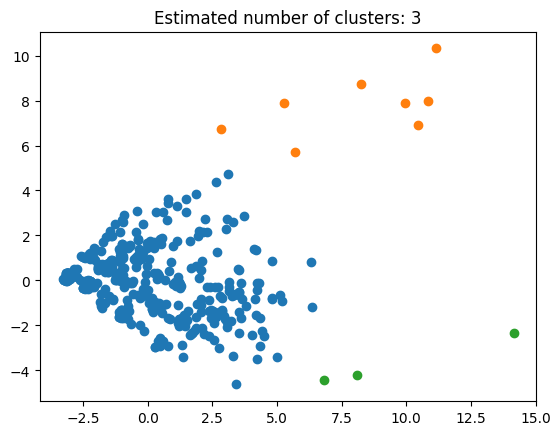

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
grupo_1 = []
grupo_2 = []
grupo_3 = []
for index in df_caracteristicas_selecionadas_deputados.index:
  if labels[index] == 0:
    grupo_1.append(df_caracteristicas_selecionadas_deputados['nome'][index])
  elif labels[index] == 1:
    grupo_2.append(df_caracteristicas_selecionadas_deputados['nome'][index])
  else:
    grupo_3.append(df_caracteristicas_selecionadas_deputados['nome'][index])

print("grupo 1")
np.array(grupo_1)

grupo 1


array(['Abilio Brunini', 'Acácio Favacho', 'Adail Filho',
       'Adilson Barroso', 'Adolfo Viana', 'Adriana Ventura',
       'Adriano do Baldy', 'Aécio Neves', 'Afonso Hamm', 'Afonso Motta',
       'Aguinaldo Ribeiro', 'Airton Faleiro', 'AJ Albuquerque',
       'Alberto Fraga', 'Alberto Mourão', 'Albuquerque', 'Alceu Moreira',
       'Alencar Santana', 'Alex Manente', 'Alex Santana',
       'Alexandre Guimarães', 'Alexandre Leite', 'Alexandre Lindenmeyer',
       'Alfredinho', 'Alfredo Gaspar', 'Alice Portugal', 'Aliel Machado',
       'Altineu Côrtes', 'Aluisio Mendes', 'Amália Barros',
       'Amanda Gentil', 'Amaro Neto', 'Amom Mandel', 'Ana Paula Leão',
       'Ana Paula Lima', 'Ana Pimentel', 'André Fernandes',
       'André Ferreira', 'André Figueiredo', 'André Fufuca',
       'André Janones', 'Andreia Siqueira', 'Antônia Lúcia',
       'Antonio Andrade', 'Antonio Brito', 'Antonio Carlos Rodrigues',
       'Antônio Doido', 'Any Ortiz', 'Arlindo Chinaglia',
       'Arnaldo Jardim

In [ ]:
print("grupo 2")
np.array(grupo_2)

grupo 2


array(['Delegado Matheus Laiola', 'Duarte', 'Fred Costa',
       'Laura Carneiro', 'Maria Rosas', 'Renata Abreu', 'Rubens Otoni',
       'Sâmia Bomfim'], dtype='<U23')

In [ ]:
print("grupo 3")
np.array(grupo_3)

grupo 3


array(['José Medeiros', 'Marangoni', 'Marcel van Hattem'], dtype='<U17')

In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['nome'] == 'Marangoni']

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
326,220648,Marangoni,1,0,0,0,388,8,10,0,5,3,7,8,3


In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['nome'] == 'Marcos Pereira']

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
342,204506,Marcos Pereira,1,0,3,0,384,0,1,0,0,0,0,0,1


In [ ]:
df_caracteristicas_selecionadas_deputados.iloc[[0,1,2,3], :]

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
0,220593,Abilio Brunini,0,0,2,1,82,2,4,1,1,2,2,2,1
1,204379,Acácio Favacho,1,0,0,2,63,1,3,1,0,0,1,0,2
2,220714,Adail Filho,2,0,1,0,128,1,3,0,2,0,0,0,1
3,221328,Adilson Barroso,2,0,2,0,43,2,2,0,1,1,1,1,1


In [ ]:
df_caracteristicas_selecionadas_deputados.loc[df_caracteristicas_selecionadas_deputados['Sem tema'] >= 200]

,id_deputado,nome,Votacao 2301683_33,Votacao 2350702_8,Votacao 2350706_6,Votacao 2351332_7,Sem tema,Direitos Humanos e Minorias,Finanças Públicas e Orçamento,"Política, Partidos e Eleições",Direito Penal e Processual Penal,Economia,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,"Arte, Cultura e Religião"
6,121948,Adriano do Baldy,1,0,2,0,219,1,1,0,0,0,0,0,1
90,73441,Celso Russomanno,1,2,1,2,222,1,3,0,1,2,2,2,2
161,204412,Dr. Zacharias Calil,1,0,0,0,204,3,4,0,1,2,2,2,2
326,220648,Marangoni,1,0,0,0,388,8,10,0,5,3,7,8,3
342,204506,Marcos Pereira,1,0,3,0,384,0,1,0,0,0,0,0,1


## Usando MeanShift PCA Com MinMaxScaler

In [ ]:
X = df_caracteristicas_selecionadas_deputados.iloc[: , 2:].values
X

array([[0, 0, 2, ..., 2, 2, 1],
       [1, 0, 0, ..., 1, 0, 2],
       [2, 0, 1, ..., 0, 0, 1],
       ...,
       [2, 2, 0, ..., 2, 2, 1],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 0, 2, ..., 0, 0, 1]])

In [ ]:
transformer = MinMaxScaler().fit(X)
X = transformer.transform(X)
X

array([[0.        , 0.        , 0.5       , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.33333333, 0.        , 0.        , ..., 0.14285714, 0.        ,
        0.5       ],
       [0.66666667, 0.        , 0.25      , ..., 0.        , 0.        ,
        0.25      ],
       ...,
       [0.66666667, 1.        , 0.        , ..., 0.28571429, 0.25      ,
        0.25      ],
       [0.66666667, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.5       , ..., 0.        , 0.        ,
        0.25      ]])

In [ ]:
X_pca = PCA(n_components=2).fit_transform(X)
X_pca
X_pca.shape

(513, 2)

In [ ]:

silhouette = -1
best_model = {
    'quantile': None,
    'n_samples': None,
    'labels': None,
    'n_clusters_': None,
    'cluster_centers': None,
    'silhouette': silhouette
}

for quantile in range(1, 11):
  for n_samples in range(100, 201, 50):
    bandwidth = estimate_bandwidth(X_pca, quantile=quantile/10, n_samples=n_samples)
    mean_shift = MeanShift(bandwidth=bandwidth)
    mean_shift.fit(X_pca)
    labels = mean_shift.labels_
    cluster_centers = mean_shift.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    try:
      silhouette_current = metrics.silhouette_score(X_pca, labels)
      print(f'bandwidth = {bandwidth}, quantile = {quantile}, n_samples = {n_samples}')
      print("number of estimated clusters : %d" % n_clusters_)
      print(f"Silhouette Coefficient: {silhouette_current:.3f}\n\n")

      if silhouette_current > silhouette:
        silhouette = silhouette_current
        best_model = {
            'quantile': quantile,
            'n_samples': n_samples,
            'labels': labels,
            'n_clusters_': n_clusters_,
            'cluster_centers': cluster_centers,
            'silhouette': silhouette
        }
    except:
      next

bandwidth = 0.14869560242134988, quantile = 1, n_samples = 100
number of estimated clusters : 11
Silhouette Coefficient: 0.481


bandwidth = 0.14945147487347135, quantile = 1, n_samples = 150
number of estimated clusters : 12
Silhouette Coefficient: 0.431


bandwidth = 0.1567414393770964, quantile = 1, n_samples = 200
number of estimated clusters : 11
Silhouette Coefficient: 0.478


bandwidth = 0.260269295906513, quantile = 2, n_samples = 100
number of estimated clusters : 5
Silhouette Coefficient: 0.581


bandwidth = 0.24147468393377683, quantile = 2, n_samples = 150
number of estimated clusters : 5
Silhouette Coefficient: 0.583


bandwidth = 0.25211382634876806, quantile = 2, n_samples = 200
number of estimated clusters : 5
Silhouette Coefficient: 0.580


bandwidth = 0.42121397332267635, quantile = 3, n_samples = 100
number of estimated clusters : 3
Silhouette Coefficient: 0.584


bandwidth = 0.44914354327700323, quantile = 3, n_samples = 150
number of estimated clusters : 3
Silhouet

In [ ]:
best_model

{'quantile': 4,
 'n_samples': 100,
 'labels': array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

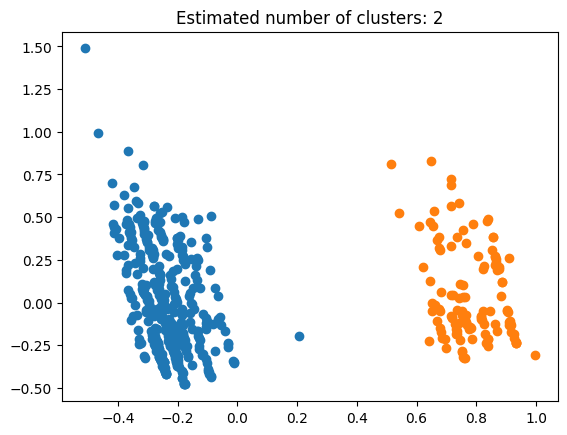

In [ ]:
plt.figure(1)
plt.clf()

# colors = ["#dede00", "#377eb8", "#f781bf", '#f9aa00', "#00AA18"]
# markers = ["p", "o", "^", '*', 's']

n_clusters_ = best_model['n_clusters_']
cluster_centers = best_model['cluster_centers']
labels = best_model['labels']

# for k, col in zip(range(n_clusters_), colors):
for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    # plt.scatter(X[my_members, 0], X[my_members, 1], color=col)
    plt.scatter(X_pca[my_members, 0], X_pca[my_members, 1], label=k)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        # markers[k],
        # markerfacecolor=col,
        # markeredgecolor="k",
        # markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
grupo_1 = []
grupo_2 = []
for index in df_caracteristicas_selecionadas_deputados.index:
  if labels[index] == 0:
    grupo_1.append(df_caracteristicas_selecionadas_deputados['nome'][index])
  elif labels[index] == 1:
    grupo_2.append(df_caracteristicas_selecionadas_deputados['nome'][index])

print("grupo 1")
np.array(grupo_1)

grupo 1


array(['Abilio Brunini', 'Acácio Favacho', 'Adail Filho',
       'Adilson Barroso', 'Adriana Ventura', 'Adriano do Baldy',
       'Afonso Motta', 'Airton Faleiro', 'AJ Albuquerque',
       'Alberto Fraga', 'Alberto Mourão', 'Alencar Santana',
       'Alex Manente', 'Alex Santana', 'Alexandre Guimarães',
       'Alexandre Leite', 'Alexandre Lindenmeyer', 'Alfredinho',
       'Alfredo Gaspar', 'Alice Portugal', 'Aliel Machado',
       'Aluisio Mendes', 'Amália Barros', 'Amanda Gentil', 'Amaro Neto',
       'Amom Mandel', 'Ana Paula Leão', 'Ana Pimentel', 'André Fernandes',
       'André Ferreira', 'André Figueiredo', 'André Fufuca',
       'André Janones', 'Antônia Lúcia', 'Antonio Carlos Rodrigues',
       'Any Ortiz', 'Arlindo Chinaglia', 'Arnaldo Jardim',
       'Arthur Oliveira Maia', 'Átila Lira', 'Augusto Coutinho',
       'Augusto Pupio', 'Bacelar', 'Bandeira de Mello', 'Bebeto',
       'Benedita da Silva', 'Benes Leocádio', 'Beto Preto', 'Beto Richa',
       'Bia Kicis', 'Bibo Nu

In [ ]:
print("grupo 2")
np.array(grupo_2)

grupo 2


array(['Adolfo Viana', 'Aécio Neves', 'Afonso Hamm', 'Aguinaldo Ribeiro',
       'Albuquerque', 'Alceu Moreira', 'Altineu Côrtes', 'Ana Paula Lima',
       'Andreia Siqueira', 'Antonio Andrade', 'Antonio Brito',
       'Antônio Doido', 'Arthur Lira', 'Átila Lins', 'Aureo Ribeiro',
       'Baleia Rossi', 'Beto Pereira', 'Bruno Farias', 'Carla Zambelli',
       'Celso Russomanno', 'Celso Sabino', 'Dagoberto Nogueira',
       'Daniel Barbosa', 'Danrlei de Deus Hinterholz',
       'Delegado Paulo Bilynskyj', 'Detinha', 'Diego Andrade',
       'Domingos Sávio', 'Dr. Frederico', 'Dra. Alessandra Haber',
       'Duarte', 'Duda Salabert', 'Eduardo da Fonte', 'Eli Borges',
       'Elmar Nascimento', 'Enio Verri', 'Erika Hilton',
       'Euclydes Pettersen', 'Evair Vieira de Melo', 'Fábio Macedo',
       'Félix Mendonça Júnior', 'Fernanda Melchionna', 'Fernanda Pessoa',
       'Fernando Coelho Filho', 'Fernando Monteiro', 'Fernando Rodolfo',
       'Fred Costa', 'General Pazuello', 'Gustinho Rib

## Nova seção